In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data

In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\LSTM Data\LSTM Practice Model\NVDA.csv")
data = data["Close"]
#data = pd.DataFrame(data)
data = data[-32:].reset_index() ####### ####### ####### ######## ####### ####### 
data = data["Close"]
data

0     131.38
1     134.91
2     127.40
3     129.24
4     128.44
5     126.36
6     117.99
7     121.09
8     117.93
9     123.54
10    122.59
11    114.25
12    112.28
13    113.06
14    111.59
15    103.73
16    117.02
17    109.21
18    107.27
19    100.45
20    104.25
21     98.91
22    104.97
23    104.75
24    109.02
25    116.14
26    118.08
27    122.86
28    124.58
29    130.00
30    127.25
31    128.50
Name: Close, dtype: float64

## Single_Class Model

In [20]:
class TradingStrategy:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    def __init__(self, data):
        self.data = data
        
    ####################### ####################### ####################### ####################### ####################### ####################### ########
    def trail_function(self, sell_rate, buy_rate):
        
        # Variables for tracking orders and positions
        orders = []
        current_position = "Buy"
        
        # Initial conditions
        interval_max_price = self.data[0]
        stop_price_sell = interval_max_price * (1 - sell_rate)
        stop_price_buy = interval_max_price * (1 + buy_rate)
        
        # Trading loop
        for day_price in self.data:
            if current_position == "Buy":
                if day_price > interval_max_price:
                    interval_max_price = day_price
                    stop_price_sell = interval_max_price * (1 - sell_rate)

                elif day_price <= stop_price_sell:
                    orders.append(("Sell", day_price))
                    current_position = "Sell"
                    interval_max_price = day_price
                    stop_price_buy = interval_max_price * (1 + buy_rate)

            elif current_position == "Sell":
                if day_price < interval_max_price:
                    interval_max_price = day_price
                    stop_price_buy = interval_max_price * (1 + buy_rate)

                elif day_price >= stop_price_buy:
                    orders.append(("Buy", day_price))
                    current_position = "Buy"
                    interval_max_price = day_price
                    stop_price_sell = interval_max_price * (1 - sell_rate)
        return orders
        
    ####################### ####################### ####################### ####################### ####################### ####################### ########
    def calculate_total_profit(self, trade_dict):
        total_profit = 0
        initial_price = None

        for action, price in trade_dict:
            if action == 'Buy':
                initial_price = price
            elif action == 'Sell' and initial_price is not None:
                total_profit += (price / initial_price) - 1
                initial_price = price
        return total_profit
        
    ####################### ####################### ####################### ####################### ####################### ####################### ########
    def calculate_profit(self, trade_dict):
        transaction_returns = []
        initial_price = None

        for action, price in trade_dict:
            if action == 'Buy':
                initial_price = price
            elif action == 'Sell' and initial_price is not None:
                transaction_returns.append((price / initial_price) - 1)
                initial_price = price
        return transaction_returns
        
    ####################### ####################### ####################### ####################### ####################### ####################### ########
    def optimize_trading_rates(self, buy_rate_start=0.01):
        data = self.data

        # Initialize variables
        returns = []
        sell_rate = []
        num_transactions = []
        Trading_Strategy = TradingStrategy(data)
        
        # Calculate returns and transactions for different sell rates
        for i in range(0, 100, 1):  # Using integers and dividing by 100
            i = i / 100.0
            sell_rate.append(i)
            returns.append(Trading_Strategy.calculate_total_profit(Trading_Strategy.trail_function(i, buy_rate_start)))
            num_transactions.append(len(Trading_Strategy.trail_function(i, buy_rate_start)))
    
        # Calculate transaction index for sell rates
        transaction_index = [
            (returns[j] / num_transactions[j]) if num_transactions[j] != 0 else 0 
            for j in range(len(sell_rate))
        ]
    
        # Find the optimized sell rate
        transaction_index_array = np.array(transaction_index)
        index = np.where(transaction_index_array == np.max(transaction_index_array))[0]
        optimized_sell_rate = sell_rate[index[0]]    


        
        # Initialize variables for buy rate optimization
        returns_Buy = []
        buy_rate = []
        num_transactions_Buy = []
    
        # Calculate returns and transactions for different buy rates
        for i in range(0, 100, 1):  # Using integers and dividing by 100
            i = i / 100.0
            buy_rate.append(i)
            returns_Buy.append(Trading_Strategy.calculate_total_profit(Trading_Strategy.trail_function(optimized_sell_rate, i)))
            num_transactions_Buy.append(len(Trading_Strategy.trail_function(optimized_sell_rate, i)))
    
        # Calculate transaction index for buy rates
        transaction_index_Buy = [
            (returns_Buy[j] / num_transactions_Buy[j]) if num_transactions_Buy[j] != 0 else 0 
            for j in range(len(buy_rate))
        ]
    
        # Find the optimized buy rate
        transaction_index_array_Buy = np.array(transaction_index_Buy)
        index = np.where(transaction_index_array_Buy == np.max(transaction_index_array_Buy))[0]
        optimized_buy_rate = buy_rate[index[0]]

        total_optimized_return = Trading_Strategy.calculate_total_profit(Trading_Strategy.trail_function(optimized_sell_rate, optimized_buy_rate))
        num_transaction = len(Trading_Strategy.trail_function(optimized_sell_rate, optimized_buy_rate))



        return {"optimized_sell_rate":optimized_sell_rate, 
                "optimized_buy_rate":optimized_buy_rate, 
                "returns":returns, 
                "returns_Buy":returns_Buy, 
                "num_transactions":num_transactions, 
                "num_transactions_Buy":num_transactions_Buy, 
                "transaction_index":transaction_index, 
                "transaction_index_Buy":transaction_index_Buy, 
                "total_optimized_return":total_optimized_return, 
                "num_transaction": num_transaction}
    
    ####################### ####################### ####################### ####################### ####################### ####################### ########
    def index_visualization(self):
        plt.figure(figsize=(10, 3))  # Adjust size if necessary
        
        # Plot returns on the left y-axis
        plt.plot(trading_strategy.optimize_trading_rates()["returns"], label='returns')
        plt.xlabel('Time')
        plt.ylabel('Returns')
        
        # Create a twin y-axis to plot num_transactions on the right y-axis
        ax2 = plt.twinx()
        ax2.plot(trading_strategy.optimize_trading_rates()["num_transactions"], color='orange', label='num_transactions')
        ax2.set_ylabel('Number of Transactions')
        
        # Add title and legends
        plt.title('Time Series Comparison')
        plt.legend(loc='upper left')
        ax2.legend(loc='upper right')
        
        # Show plot
        plt.show()
        plt.figure(figsize=(10, 3))  # Adjust size if necessary
        
        # Plot returns on the left y-axis
        plt.plot(trading_strategy.optimize_trading_rates()["returns"], label='returns')
        plt.xlabel('Time')
        plt.ylabel('Returns')
        
        # Create a twin y-axis to plot num_transactions on the right y-axis
        ax2 = plt.twinx()
        ax2.plot(trading_strategy.optimize_trading_rates()["transaction_index"], color='orange', label='transaction_index')
        ax2.set_ylabel('transaction_index')
        
        # Add title and legends
        plt.title('Time Series Comparison')
        plt.legend(loc='upper left')
        ax2.legend(loc='upper right')
        
        # Show plot
        plt.show()
        
        '''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''' 
        
        plt.figure(figsize=(10, 3))  # Adjust size if necessary
        
        # Plot returns on the left y-axis
        plt.plot(trading_strategy.optimize_trading_rates()["returns_Buy"], label='returns')
        plt.xlabel('Time')
        plt.ylabel('Returns')
        
        # Create a twin y-axis to plot num_transactions on the right y-axis
        ax2 = plt.twinx()
        ax2.plot(trading_strategy.optimize_trading_rates()["num_transactions_Buy"], color='orange', label='num_transactions')
        ax2.set_ylabel('Number of Transactions')
        
        # Add title and legends
        plt.title('Time Series Comparison')
        plt.legend(loc='upper left')
        ax2.legend(loc='upper right')
        
        # Show plot
        plt.show()
        
        plt.figure(figsize=(10, 3))  # Adjust size if necessary
        
        # Plot returns on the left y-axis
        plt.plot(trading_strategy.optimize_trading_rates()["returns_Buy"], label='returns')
        plt.xlabel('Time')
        plt.ylabel('Returns')
        
        # Create a twin y-axis to plot num_transactions on the right y-axis
        ax2 = plt.twinx()
        ax2.plot(trading_strategy.optimize_trading_rates()["transaction_index_Buy"], color='orange', label='transaction_index')
        ax2.set_ylabel('transaction_index')
        
        # Add title and legends
        plt.title('Time Series Comparison')
        plt.legend(loc='upper left')
        ax2.legend(loc='upper right')
        
        # Show plot
        plt.show()

    ####################### ####################### ####################### ####################### ####################### ####################### ########
    def transactions_visualization(self, MA_Window=5, transactions=None):
        data = self.data
        trading_strategy = TradingStrategy(data)
        
        if transactions == None:    
            transactions = trading_strategy.trail_function(trading_strategy.optimize_trading_rates()["optimized_sell_rate"], 
                                                           trading_strategy.optimize_trading_rates()["optimized_buy_rate"])
            
        # Calculate the moving average with a window of 5
        moving_average = data.rolling(window=MA_Window).mean()
        
        # Find the indices of the transaction prices in the time series
        buy_indices = []
        sell_indices = []
        buy_prices = []
        sell_prices = []
        
        for transaction in transactions:
            transaction_type, transaction_price = transaction
            # Find the closest index for each transaction price
            index = (np.abs(data - transaction_price)).idxmin() 
                                                                 
            if transaction_type.lower() == 'buy':
                buy_indices.append(index)
                buy_prices.append(data[index])
            elif transaction_type.lower() == 'sell':
                sell_indices.append(index)
                sell_prices.append(data[index])
        
        # Plot the time series
        plt.figure(figsize=(17, 10))
        plt.plot(data, label='Price', color='blue')
        
        # Plot the moving average
        plt.plot(moving_average, label='Moving Average (Window=5)', color='orange')
        
        # Plot buy signals
        plt.scatter(buy_indices, buy_prices, marker='^', color='green', s=100, label='Buy Signal')
        
        # Plot sell signals
        plt.scatter(sell_indices, sell_prices, marker='v', color='red', s=100, label='Sell Signal')
        
        # Add labels and title
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.title('Time Series with Buy and Sell Signals')
        plt.legend()
        
        # Show plot
        plt.show()
        return plt.gcf()

######################### ###################### ########################## ###################### ######################## #######################

    def moving_window_optimization(self, ma_ranges=(30, 50)):
        data = self.data
        trading_strategy = TradingStrategy(data)
        # Starting Grownds
        transaction_index_ls = []
        moving_window_size = []
        
        for i in range(ma_ranges[0], ma_ranges[1]):
            # Determine the batch size
            moving_window = i
            transaction_index_batch_ls = []
            
            # Split the data into batches of 20 entries
            batches = [data[j:j + moving_window] for j in range(0, len(data), moving_window)]
        
            # Reset index for each batch
            batches = [batch.reset_index(drop=True) for batch in batches]
            
            # Access each batch
            for batch in batches:
                trading_strategy = TradingStrategy(batch)
                returns = trading_strategy.calculate_total_profit(trading_strategy.trail_function(trading_strategy.optimize_trading_rates()["optimized_sell_rate"], 
                                                                                                  trading_strategy.optimize_trading_rates()["optimized_buy_rate"]))
                num_transactions = trading_strategy.optimize_trading_rates()["num_transaction"]
        
                if num_transactions != 0:
                    transaction_index_batch_ls.append(returns / num_transactions)
        
                elif num_transactions == 0: 
                    transaction_index_batch_ls.append(0)
            
            # Saving the result
            transaction_index_ls.append(np.mean(transaction_index_batch_ls))
            moving_window_size.append(moving_window)
            
        # Saving the optimized_moving_window
        transaction_index_ls_array = np.array(transaction_index_ls)
        index = np.where(transaction_index_ls_array == np.max(transaction_index_ls))[0]
        optimized_moving_window = moving_window_size[index[0]]
        optimized_moving_window
        
        batches = [data[j:j + optimized_moving_window] for j in range(0, len(data), optimized_moving_window)]
        batches = [batch.reset_index(drop=True) for batch in batches]
        
        total_trades = []
        for batch in batches:
            trading_strategy = TradingStrategy(batch)
            trades = trading_strategy.trail_function(trading_strategy.optimize_trading_rates()["optimized_sell_rate"], 
                                                     trading_strategy.optimize_trading_rates()["optimized_buy_rate"])
            #total_trades.append(trades)
            total_trades = total_trades + trades
        return {"total_trades":total_trades,
                "transaction_index_ls_array":transaction_index_ls_array,
                "optimized_moving_window":optimized_moving_window, 
                "moving_window_size":moving_window_size
               }
    
    ############################# ################################## ############################### ############################### ####################### ##########################
    
    def kairos(self, trades_1_0=None):
        data = self.data
        trading_strategy = TradingStrategy(data)
    
        print(trading_strategy.moving_window_optimization()["optimized_moving_window"])
        
        plt.figure(figsize=(10, 5))
        plt.plot(trading_strategy.moving_window_optimization()["transaction_index_ls_array"], label='transaction_index_ls', marker='o')
        #plt.plot(trading_strategy.moving_window_optimization()["moving_window_size"], label='moving_window_size', marker='x')
        
        # Adding titles and labels
        plt.title('Line Plot of Two Columns')
        plt.xlabel('Index')
        plt.ylabel('Values')
        plt.legend()
        plt.grid()
        
        # Show plot
        plt.show()
    
        # Transaction Visualization
        trading_strategy.transactions_visualization(transactions=trading_strategy.moving_window_optimization()["total_trades"])
        
        if trades_1_0 != None:
            trades = trading_strategy.moving_window_optimization()["total_trades"]
            print(trading_strategy.calculate_total_profit(trades))
            print(" ")
            print(trading_strategy.calculate_profit(trades))
            print(" ")
            print(trades)


################################# ############################### ################################## ############################### #################

## Full Optimization

In [7]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\LSTM Data\LSTM Practice Model\NVDA.csv")
data = data["Close"]
data = data[-300:].reset_index()
data = data["Close"]
########################################################################################################################################################

def moving_window_optimization(self, ma_ranges=(30, 50)):
    data = self.data
    trading_strategy = TradingStrategy(data)
    # Starting Grownds
    transaction_index_ls = []
    moving_window_size = []
    
    for i in range(ma_ranges[0], ma_ranges[1]):
        # Determine the batch size
        moving_window = i
        transaction_index_batch_ls = []
        
        # Split the data into batches of 20 entries
        batches = [data[j:j + moving_window] for j in range(0, len(data), moving_window)]
    
        # Reset index for each batch
        batches = [batch.reset_index(drop=True) for batch in batches]
        
        # Access each batch
        for batch in batches:
            trading_strategy = TradingStrategy(batch)
            returns = trading_strategy.calculate_total_profit(trading_strategy.trail_function(trading_strategy.optimize_trading_rates()["optimized_sell_rate"], 
                                                                                              trading_strategy.optimize_trading_rates()["optimized_buy_rate"]))
            num_transactions = trading_strategy.optimize_trading_rates()["num_transaction"]
    
            if num_transactions != 0:
                transaction_index_batch_ls.append(returns / num_transactions)
    
            elif num_transactions == 0: 
                transaction_index_batch_ls.append(0)
        
        # Saving the result
        transaction_index_ls.append(np.mean(transaction_index_batch_ls))
        moving_window_size.append(moving_window)
        
    # Saving the optimized_moving_window
    transaction_index_ls_array = np.array(transaction_index_ls)
    index = np.where(transaction_index_ls_array == np.max(transaction_index_ls))[0]
    optimized_moving_window = moving_window_size[index[0]]
    optimized_moving_window
    
    batches = [data[j:j + optimized_moving_window] for j in range(0, len(data), optimized_moving_window)]
    batches = [batch.reset_index(drop=True) for batch in batches]
    
    total_trades = []
    for batch in batches:
        trading_strategy = TradingStrategy(batch)
        trades = trading_strategy.trail_function(trading_strategy.optimize_trading_rates()["optimized_sell_rate"], 
                                                 trading_strategy.optimize_trading_rates()["optimized_buy_rate"])
        #total_trades.append(trades)
        total_trades = total_trades + trades
    return {"total_trades":total_trades,
            "transaction_index_ls_array":transaction_index_ls_array,
            "optimized_moving_window":optimized_moving_window, 
            "moving_window_size":moving_window_size
           }

############################# ################################## ############################### ############################### ####################### ##########################

def kairos(self):
    data = self.data
    trading_strategy = TradingStrategy(data)

    print(trading_strategy.moving_window_optimization()["optimized_moving_window"])
    
    plt.figure(figsize=(10, 5))
    plt.plot(trading_strategy.moving_window_optimization()["transaction_index_ls_array"], label='transaction_index_ls', marker='o')
    #plt.plot(trading_strategy.moving_window_optimization()["moving_window_size"], label='moving_window_size', marker='x')
    
    # Adding titles and labels
    plt.title('Line Plot of Two Columns')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.grid()
    
    # Show plot
    plt.show()

    # Transaction Visualization
    trading_strategy.transactions_visualization(transactions=trading_strategy.moving_window_optimization()["total_trades"])


## Testing

In [7]:
def moving_average_trading_profit(prices, window_size):
    
    # Calculate the moving average
    moving_avg = np.convolve(prices, np.ones(window_size)/window_size, mode='valid')
    
    # Initialize variables
    total_profit = 0
    position = None  # No position initially
    buy_price = 0
    
    # Loop through the prices starting from the point where moving average is valid
    for i in range(window_size - 1, len(prices)):
        price = prices[i]
        ma = moving_avg[i - (window_size - 1)]  # Get the corresponding moving average
        
        if price > ma and position != 'buy':  # Buy condition
            if position == 'sell':  # If previously sold, close the sell position
                total_profit += price - buy_price
            buy_price = price
            position = 'buy'
        
        elif price < ma and position != 'sell':  # Sell condition
            if position == 'buy':  # If previously bought, close the buy position
                total_profit += price - buy_price
            position = 'sell'
    
    return total_profit

In [6]:
import numpy as np

def moving_average_trading_profit_percent(prices, window_size):

    # Calculate the moving average
    moving_avg = np.convolve(prices, np.ones(window_size)/window_size, mode='valid')
    
    # Initialize variables
    total_profit = 0
    total_invested = 0
    position = None  # No position initially
    buy_price = 0
    
    # Loop through the prices starting from the point where moving average is valid
    for i in range(window_size - 1, len(prices)):
        price = prices[i]
        ma = moving_avg[i - (window_size - 1)]  # Get the corresponding moving average
        
        if price > ma and position != 'buy':  # Buy condition
            if position == 'sell':  # If previously sold, close the sell position
                total_profit += price - buy_price
            buy_price = price
            total_invested += buy_price  # Add the buy price to total invested
            position = 'buy'
        
        elif price < ma and position != 'sell':  # Sell condition
            if position == 'buy':  # If previously bought, close the buy position
                total_profit += price - buy_price
                position = 'sell'
    
    # If there is still a position, close it at the last price
    if position == 'buy':
        total_profit += prices[-1] - buy_price
    
    # Calculate percentage profit
    if total_invested == 0:
        return 0  # Prevent division by zero if no trades were made
    
    percent_profit = (total_profit / total_invested)
    return percent_profit


30


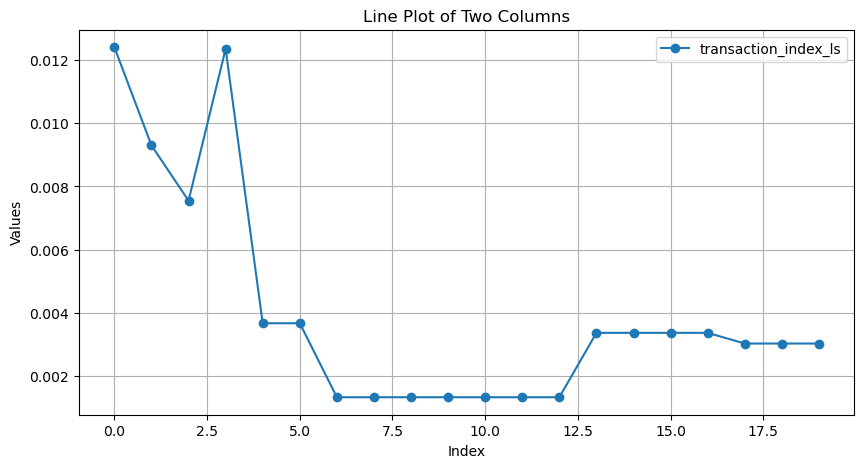

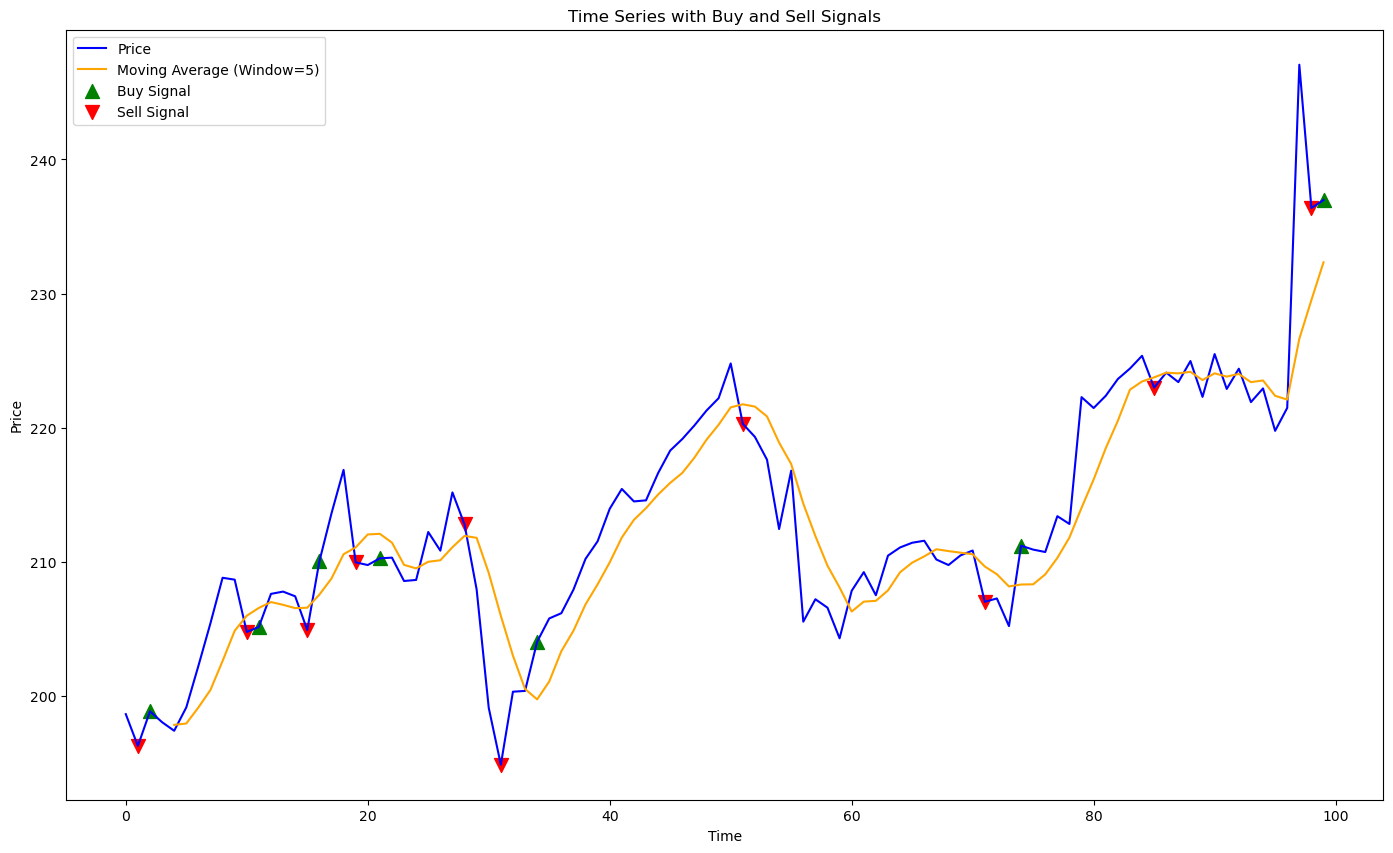

0.09129463689927053
 
[0.029716411906677287, -0.0011210215918505684, -0.0003332539871460094, 0.011984021304926706, -0.08411654135338353, 0.0795844359502107, -0.06019064911484351, 0.05577123378467941, 0.06000000000000005]
 
[('Sell', 196.3), ('Buy', 198.88), ('Sell', 204.79), ('Buy', 205.17), ('Sell', 204.94), ('Buy', 210.05), ('Sell', 209.98), ('Buy', 210.28), ('Sell', 212.8), ('Sell', 194.9), ('Buy', 204.06), ('Sell', 220.3), ('Sell', 207.04), ('Buy', 211.22), ('Sell', 223.0), ('Sell', 236.38), ('Buy', 236.98)]


40.629999999999995

<Figure size 640x480 with 0 Axes>

In [27]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\MA Model Data - Sheet2.csv")
#data = data["Close"]
data = data[-100:].reset_index()
data = data["JPM"]



tradingStrategy = TradingStrategy(data)
result = tradingStrategy.kairos(trades_1_0=1)
moving_average_trading_profit(data, 10)

In [23]:
result

In [11]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\MA Model Data - Sheet2.csv")
#data = data["Close"]
data = data[-50:].reset_index()
data.columns[9:]

Index(['WMT', 'JPM', 'V', 'MA', 'COST', 'HD', 'PG', 'JNJ', 'WMT.1', 'ABBV',
       'NFLX', 'CRM', 'BAC', 'ORCL', 'CVX', 'MRK', 'KO', 'AMD', 'WFC', 'CSCO',
       'PEP', 'ACN', 'LIN', 'ADBE', 'MCD', 'TMO', 'NOW', 'ABT', 'TXN', 'GE',
       'IBM', 'PM', 'INTU', 'CAT', 'QCOM', 'ISRG', 'GS', 'DIS', 'AMGN', 'VZ',
       'CMCSA', 'BKNG', 'RTX', 'AXP', 'MS', 'SPGI', 'T', 'AMAT', 'NEE', 'DHR',
       'LOW', 'PGR', 'PFE', 'UBER', 'UNP', 'ETN', 'BLK', 'HON', 'VRTX', 'TJX',
       'C', 'BSX', 'COP', 'SYK', 'BX', 'PANW', 'ADP', 'MU', 'FI', 'GILD',
       'LMT', 'PLTR', 'TMUS', 'MDT', 'ADI', 'INTC', 'BA', 'MMC', 'SBUX',
       'SCHW', 'BMY', 'PLD', 'CB', 'ANET', 'KKR', 'LRCX', 'DE', 'ELV', 'SO',
       'UPS', 'AMT', 'GEV'],
      dtype='object')

## Scratchpad

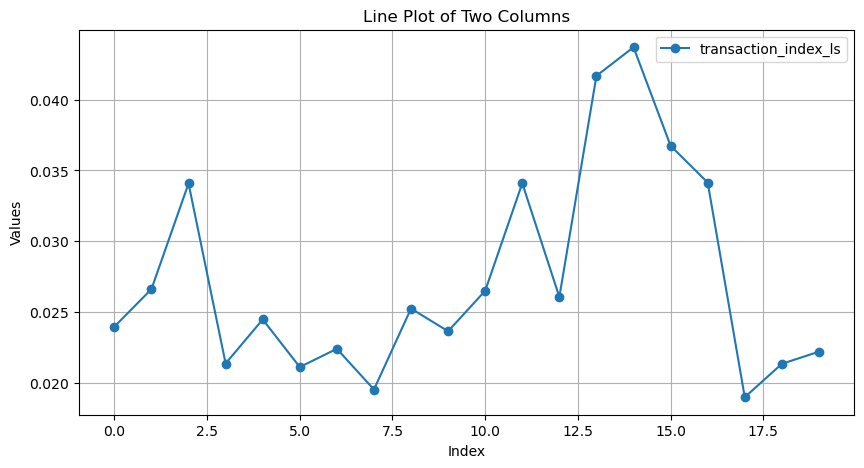

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame with two columns
# Replace 'Column1' and 'Column2' with the actual names of your columns
plt.figure(figsize=(10, 5))
plt.plot(results['transaction_index_ls'], label='transaction_index_ls', marker='o')
plt.plot(results['moving_window_size'], label='moving_window_size', marker='x')

# Adding titles and labels
plt.title('Line Plot of Two Columns')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid()

# Show plot
plt.show()


In [6]:
data1 = pd.read_csv(r"C:\Users\DELL\Desktop\LSTM Data\LSTM Practice Model\NVDA.csv")
data1 = data1["Close"]
#data = pd.DataFrame(data)
data1 = data1[-30:].reset_index() ####### ####### ####### ######## ####### ####### 
data1 = data1["Close"]

for i in range(10, 11):
    # Determine the batch size
    moving_window = i
    transaction_index_batch_ls = []
    
    # Split the data into batches of 20 entries
    batches = [data1[j:j + moving_window] for j in range(0, len(data1), moving_window)]

batches = [batch.reset_index(drop=True) for batch in batches]

trading_strategy = TradingStrategy(batches[0])
returns = trading_strategy.calculate_total_profit(trading_strategy.trail_function(trading_strategy.optimize_trading_rates()["optimized_sell_rate"], trading_strategy.optimize_trading_rates()["optimized_buy_rate"]))
batches[0]

trading_strategy1 = TradingStrategy(batches[0])
trading_strategy1.transactions_visualization()

0    127.40
1    129.24
2    128.44
3    126.36
4    117.99
5    121.09
6    117.93
7    123.54
8    122.59
9    114.25
Name: Close, dtype: float64

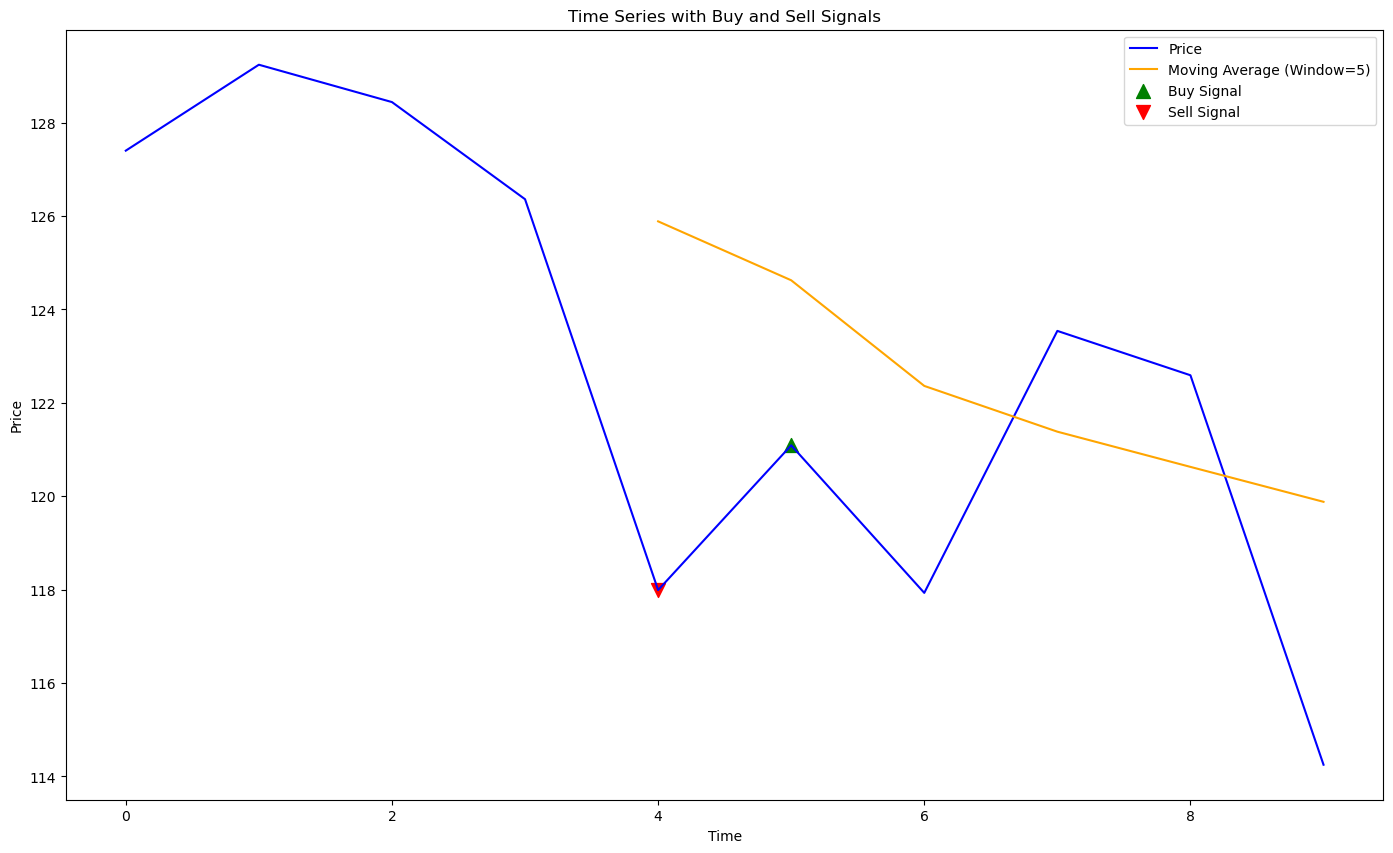

In [7]:
trading_strategy1 = TradingStrategy(batches[0])
trading_strategy1.transactions_visualization()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[4], line 18
     15 batches = [batch.reset_index(drop=True) for batch in batches]
     17 trading_strategy = TradingStrategy(batches[0])
---> 18 returns = trading_strategy.calculate_total_profit(trading_strategy.trail_function(trading_strategy.optimize_trading_rates()["optimized_sell_rate"], trading_strategy.optimize_trading_rates()["optimized_buy_rate"]))
     19 batches[0]

Cell In[3], line 76, in TradingStrategy.optimize_trading_rates(self, buy_rate_start)
     74 sell_rate = []
     75 num_transactions = []
---> 76 Trading_Strategy = TradingStrategy(data)
     78 # Calculate returns and transactions for different sell rates
     79 for i in range(0, 100, 1):  # Using integers and dividing by 100

NameError: name 'data' is not defined